# 1. Google Play Store apps and reviews

##### Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

1)apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.


2)user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

Project Tasks:

1. Google Play Store apps and reviews
2. Data cleaning
3. Exploring app categories
4. Distribution of app ratings
5. Size and price of an app
6. Relation between app category and app price
7. Filter out "junk" apps
8. Popularity of paid apps vs free apps
9. Sentiment analysis of user reviews

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into pandas
android_app = pd.read_csv("C:/Users/Sayali Pawar/Desktop/DataCampProjects/TheAndroidAppMarketOnGooglePlay/googleplaystore.csv")

print("Total number of apps:", android_app.columns)


Total number of apps: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [54]:
# To check if there are any duplicate records present

#android_app['android_app_with_dup'] = android_app.duplicated()
#android_app['android_app_with_dup'].value_counts()             #There are almost 483 dup records

In [55]:
#To log the duplicates in different dataframe 

df_droplog = pd.DataFrame()
mask = android_app.duplicated()
#print(mask.value_counts())  
df_droplog = df_droplog.append(android_app.loc[mask])
print("We have almost "+str(len(df_droplog))+ " duplicated rows!")

# Below commands that have rows to keep i.e., no dup records

#df_keep = android_app.loc[~mask]
#print(len(df_keep))

We have almost 483 duplicated rows!


In [56]:
# Dropping duplicated rows

apps = android_app.drop_duplicates()

In [57]:
print("Total number of apps with duplicates", len(android_app))
print("Total number of apps with no duplicates:", len(apps))


Total number of apps with duplicates 10841
Total number of apps with no duplicates: 10358


In [58]:
# To print a summary of apps dataframe

apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [59]:
# Have a look at a random sample of 5 rows

print(apps.sample(5))

                                                    App      Category  Rating  \
3465                                  Microsoft OneNote  PRODUCTIVITY     4.4   
7674                                         CP Clicker     LIFESTYLE     4.2   
9772                            Get SMART ER/LA Opioids       MEDICAL     NaN   
1587  Pronunciation and know the name of the caller ...     LIFESTYLE     4.6   
6425                                  BL 1-Click Camera   PHOTOGRAPHY     NaN   

     Reviews                Size      Installs  Type  Price Content Rating  \
3465  480643  Varies with device  100,000,000+  Free      0       Everyone   
7674     251                5.0M       10,000+  Free      0       Everyone   
9772       0                8.9M          500+  Free      0       Everyone   
1587    2167                1.4M      500,000+  Free      0       Everyone   
6425       4                1.4M          100+  Paid  $3.99       Everyone   

            Genres     Last Updated       Cu

# 2. Data cleaning

##### The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. The info() function (from the previous task) tells us that Installs and Price columns are of type object and not int or float as we would expect. This is because the column contains some characters more than just [0,9] digits. Ideally, we would want these columns to be purely numeric as their name suggests.

##### Hence, we now need to clean our data. Specifically, the special characters , and + present in Installs column and "$" present in Price column needs to be removed.


In [60]:
# Check for unique values below columns

print(apps.Price.unique())
print(apps.Installs.unique())

apps.info()

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' 'Everyone'
 '$1.20' '$1.04']
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+'

In [61]:
# The Price column contents an "Everyone" value which is a string thus won't be able to convert above to float type.

index1 = apps[apps['Price']=='Everyone'].index
index2 = apps[apps['Installs']=='Free'].index
print(index1)
print(index2)
apps.drop(index_name, inplace=True)


Int64Index([10472], dtype='int64')
Int64Index([10472], dtype='int64')


C:\Users\Sayali Pawar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [62]:

print(apps.Price.unique())
print(apps.Installs.unique())

apps.info()

['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [63]:
# List of char to remove from columns
char_to_remove = ['+', ',', '$']

# List of columns to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in char_to_remove:
        # Replace the char with the empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    # Convert col to float data type
    apps[col] = apps[col].astype(float)  

<ipython-input-63-c7b0916e9ff4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
<ipython-input-63-c7b0916e9ff4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[col] = apps[col].astype(float)


In [64]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


# 3. Exploring app categories

##### With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

##### This brings us to the following questions:

Which category has the highest share of (active) apps in the market?
Is any specific category dominating the market?
Which categories have the fewest number of apps?
We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

In [65]:
apps.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [80]:
print("Number of categories",len(apps.Category.unique()))
num_of_apps_in_category=apps.Category.value_counts()

Number of categories 33


<AxesSubplot:>

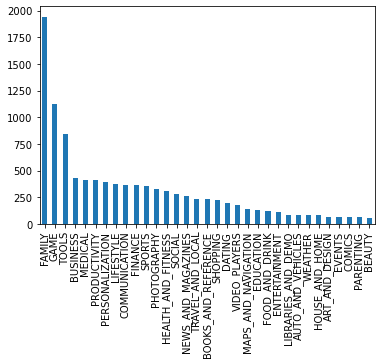

In [79]:
num_of_apps_in_category.plot(kind="bar")

# 4. Distribution of app ratings
##### After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

##### From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

In [82]:
# Average rating of apps

avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)


Average app rating =  4.187876743139908


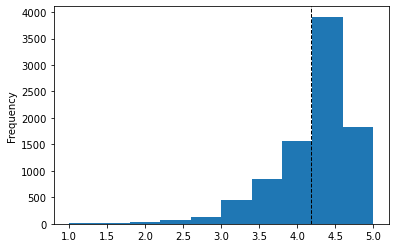

In [88]:
apps['Rating'].plot(kind='hist')
plt.axvline(avg_app_rating, color='k', linestyle='dashed', linewidth=1)

# 5. Size and price of an app

##### Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

##### How can we effectively come up with strategies to size and price our app?

Does the size of an app affect its rating?

Do users really care about system-heavy apps or do they prefer light-weighted apps?

Does the price of an app affect its rating?

Do users always prefer free apps over paid apps?

We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of 
apps price themselves under $10.

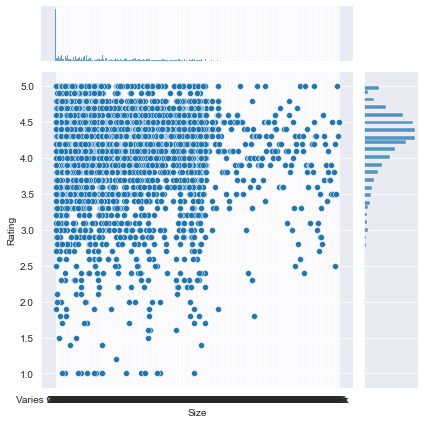

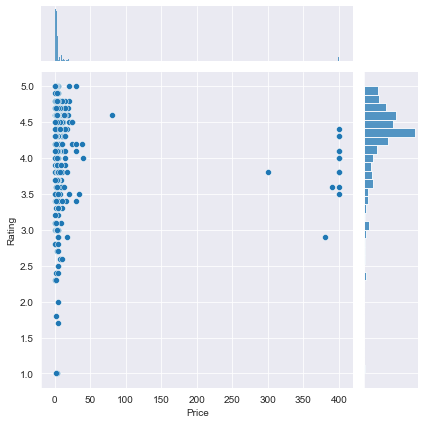

In [91]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])


# 6. Relation between app category and app price
##### So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

##### There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! 

All game apps are reasonably priced below $20.

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


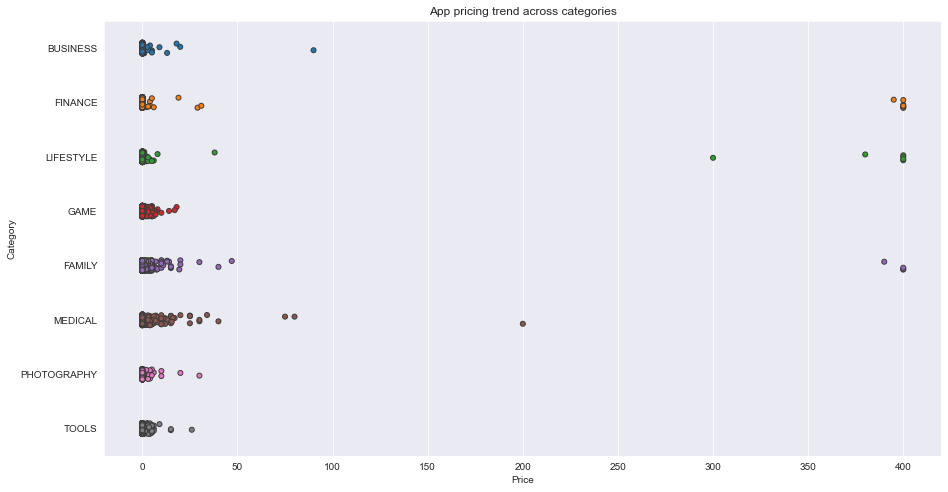

In [94]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats.Price > 200]
apps_above_200[['Category', 'App', 'Price']]

# 7. Filter out "junk" apps
##### It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called I Am Rich Premium or most expensive app (H) just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

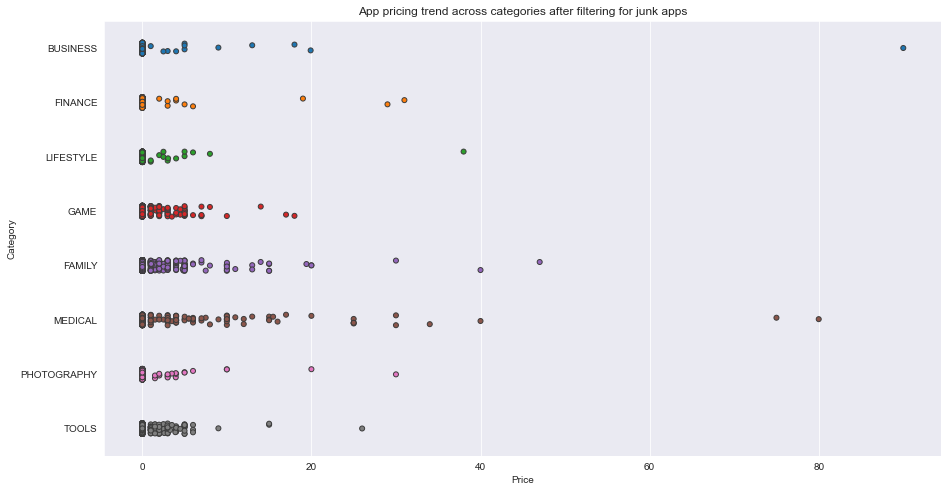

In [95]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# 8. Popularity of paid apps vs free apps
##### For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

##### Free to download.
Main source of income often comes from advertisements.
Often created by companies that have other products and the app serves as an extension of those products.
Can serve as a tool for customer retention, communication, and customer service.
Some characteristics of paid apps are:

##### Users are asked to pay once for the app to download and use it.
The user can't really get a feel for the app before buying it.
Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

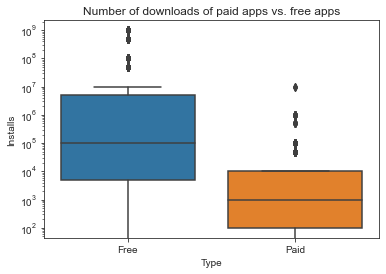

In [134]:

sns.set_style('ticks')
fig, ax = plt.subplots()

ax = sns.boxplot(x = 'Type', y = 'Installs', data = apps)
ax.set_title('Number of downloads of paid apps vs. free apps')
ax.set_yscale('log')

# 9. Sentiment analysis of user reviews
##### Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.

##### By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

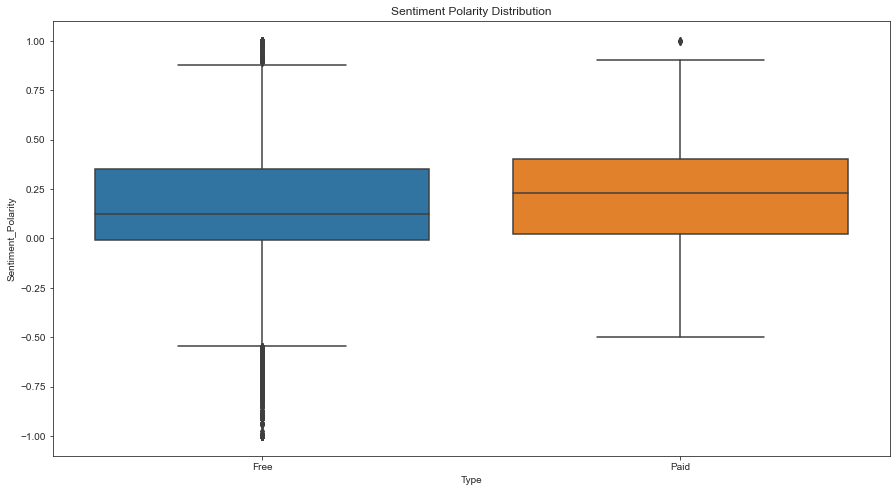

In [133]:
# Load user_reviews.csv
reviews_df = pd.read_csv('C:/Users/Sayali Pawar/Desktop/DataCampProjects/TheAndroidAppMarketOnGooglePlay/user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')